<table align="center" width=100%>
        <td>
            <div align="center">
                <font color="#21618C" size=5px>
                    <b>Stroke Prediction
                    </b>  
                </font>
            </div>
        </td>

###     Introduction

Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to
the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen
and nutrients for its correct functioning. The other way around, the brain is not able to drain and
expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is
in a critical condition as brain cells will imminently begin to die.
The American Stroke Association indicates that stroke is the fifth cause of death and disability in
the United States. For this reason, stroke is considered a severe disease and has been the
subject of extensive research, not only in the medical field but also in data science and machine
learning studies.

###    	Dataset Description

The dataset used in this article contains 5110 records of patients. Each patient has 12 columns
each referring to a concrete attribute. Most of these attributes correspond to medical records or
the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average
glucose levels in the blood, and body mass index (BMI). As we can observe from these first
attributes, the dataset provides relevant data regarding the likelihood of patients suffering from
stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has
suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact,
stroke is also an attribute in the dataset and indicates in each medical record if the patient
suffered from a stroke disease or not.


###    	Data Dictionary

**Id** - Unique Id

**gender** - gender of a ptient

**age** - age of a patient

**hypertension** - Binary Feature

**Heart_disease** - Binary Feature

**Ever_married** - Has the patient ever been married

**Work_type** - Work type of a patient

**Residency_type** - Residency type of patient

**avg_glucose_level** - Average Glucose level in the blood

**bmi**- Body mass Index

**smoking_status** - Smoking status of the patient

**stroke** - stroke event

**Import the required libraries**

In [14]:
import numpy as np
import pandas as pd

import random
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as ply
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats import boxcox
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

display(df.head(10))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data Understanding</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
print('The dataset contains',df.shape[0],'rows and',df.shape[1],'columns.')

The dataset contains 5110 rows and 12 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
## for int and float dtype
display(df.describe())
## for object dtype
display(df.describe(include='object'))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Age**: The difference of the mininmum and 25% compared to the difference of 75% and maximum is similar stating that the age is nearly normally distributed across the dataset.


**avg_glucose_level**: The data in this feature is skewed to the right as there is a notable difference between mean and the median. 

**bmi**: The data is nearly normally distributed as the mean and median values are very close with negligable difference. But, the difference of the 3rd quartile and maximum value state that there are outliers present in the data.

People with hypertension, heart_disease and stroke are underrepresented. However, in real time, people having these conditions are less than people who doesnt have these conditions making these variables relatable to the real time.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Checking for the missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
for i in df.columns:
    print('Column:',i.upper())
    print('Missing values:',df[i].isna().sum())
    print('*'*25)

Column: ID
Missing values: 0
*************************
Column: GENDER
Missing values: 0
*************************
Column: AGE
Missing values: 0
*************************
Column: HYPERTENSION
Missing values: 0
*************************
Column: HEART_DISEASE
Missing values: 0
*************************
Column: EVER_MARRIED
Missing values: 0
*************************
Column: WORK_TYPE
Missing values: 0
*************************
Column: RESIDENCE_TYPE
Missing values: 0
*************************
Column: AVG_GLUCOSE_LEVEL
Missing values: 0
*************************
Column: BMI
Missing values: 201
*************************
Column: SMOKING_STATUS
Missing values: 0
*************************
Column: STROKE
Missing values: 0
*************************


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Null Value imputation in BMI column.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
## checking missing values
print('Missing values in bmi are',df.bmi.isna().sum())
## checking skewness
print('Skewness of bmi is',df.bmi.skew())

Missing values in bmi are 201
Skewness of bmi is 1.0553402052962912


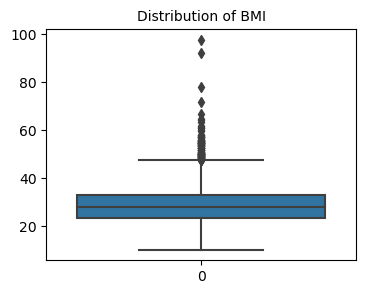

In [6]:
## distribution plot of bmi
plt.figure(figsize=(4,3))
sns.boxplot(df.bmi)
plt.title('Distribution of BMI',fontsize=10)
plt.show()

Skewness is positive.

In [7]:
## since skewness is positive imputing with median
df.bmi.fillna(value=df.bmi.median(),inplace=True)

In [8]:
## checking na values after imputation
df.bmi.isna().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Exploratory Data Analysis and Data Preprocessing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>	Visualizing the proportion of Stroke samples in the dataset.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

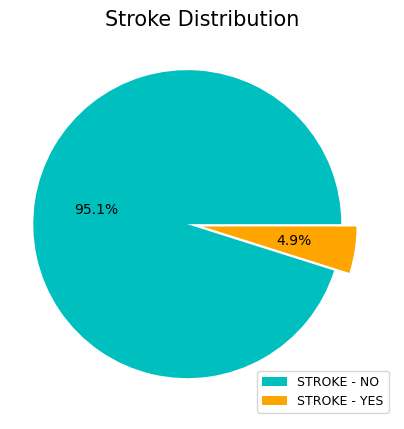

In [11]:
plt.figure(figsize=(5,5))
plt.pie(df.stroke.value_counts(),explode=[0.1,0,],autopct='%1.1f%%',colors=['c','orange'])
plt.title('Stroke Distribution',fontsize=15)
plt.legend(labels=['STROKE - NO','STROKE - YES'],loc='lower right',fontsize=9)
plt.show()

In [12]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

People who suffered stroke are less compared to those who haven't.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Visualizing the Distribution of Male and Female Ages. Write the Observation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

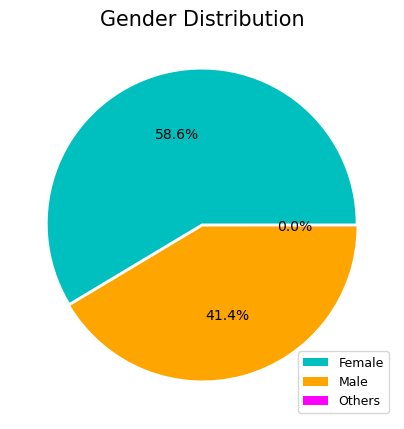

In [13]:
plt.figure(figsize=(5,5))
plt.pie(df.gender.value_counts(),explode=[0.02,0,0],autopct='%1.1f%%',colors=['c','orange','magenta'])
plt.title('Gender Distribution',fontsize=15)
plt.legend(labels=['Female','Male','Others'],loc='lower right',fontsize=9)
plt.show()

In [14]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There are close to 3000 Females(58.6%) and around 2100 males(41.4%).
Others has only 1 member.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Visualizing the stroke sample based on 
a)	BMI and Glucose Level 
b)	BMI and Age </b>
                </font>
            </div>
        </td>
    </tr>
</table>

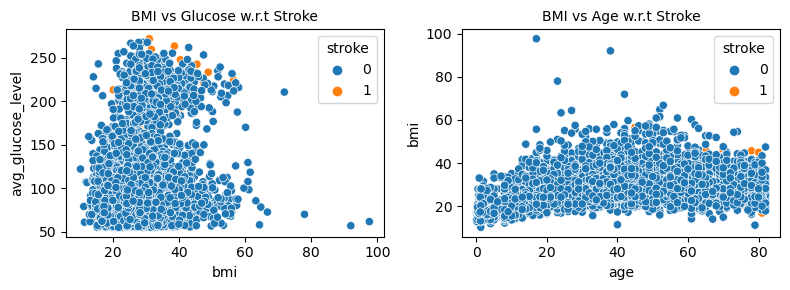

In [15]:
## using scatter plots to visualise
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('BMI vs Glucose w.r.t Stroke',fontsize=10)
sns.scatterplot(x=df.bmi,y=df.avg_glucose_level,hue=df.stroke)
plt.subplot(1,2,2)
plt.title('BMI vs Age w.r.t Stroke',fontsize=10)
sns.scatterplot(x=df.age,y=df.bmi,hue=df.stroke)
plt.tight_layout()
plt.show()

1. In the first plot majority of people with glucose lie under 60 bmi. People with stroke are less and lie above 200 glucose level.
2. In the second plot we can see that bmi lies under 60 throughout the age range. People with stroke are few and lie above age 60.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>visualizing the proportion of different smoking categories among the stroke population.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

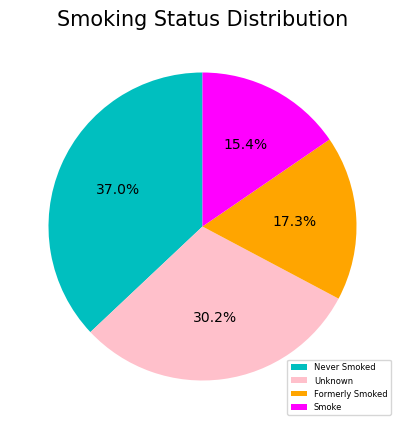

In [16]:
plt.figure(figsize=(5,5))
plt.pie(df.smoking_status.value_counts(),autopct='%1.1f%%',colors=['c','pink','orange','magenta'],startangle=90)
plt.title('Smoking Status Distribution',fontsize=15)
plt.legend(labels=['Never Smoked','Unknown','Formerly Smoked','Smoke'],loc='lower right',fontsize=6)
plt.show()

In [17]:
df.smoking_status.value_counts()/len(df)*100

never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64

1. People who have never smoked and the unknown category take up around 67%.
2. People who have smoked previously take up around 17% followed by those who smoke who account to around 15%.

In [18]:
## using map function to assign numerical values to work type column
work_dict={'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}
df.work_type=df.work_type.map(work_dict)
## using map function to assign numerical values to married column
married_dict={'Yes': 1, 'No': 0}
df.ever_married=df.ever_married.map(married_dict)
## using map function to assign numerical values to smoking status column
smoke_dict={'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}
df.smoking_status=df.smoking_status.map(smoke_dict)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Feature Selection using hypothesis testing </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
## splitting into numerical and categorical columns

## numerical columns
## id not included since entire column is unique
df_num=df[['age','avg_glucose_level','bmi']].columns
## categorical columns
df_cat=df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']].columns

In [20]:
## checking if categorical columns require encoding
df[df_cat].head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,1,0,Urban,2
1,Female,0,0,1,1,Rural,0
2,Male,0,1,1,0,Rural,0
3,Female,0,0,1,0,Urban,-1
4,Female,1,0,1,1,Rural,0


Gender and Residence type require encoding.

In [21]:
## using LabelEncoder
## initialising label encoder
le=LabelEncoder()

for i in ['gender','Residence_type']:
    df[i]=le.fit_transform(df[i])

Uisng chi2 test of independece to check the dependence of categorical features on target.

In [22]:
## choosing alpha as 0.05
alpha=0.05
## assuming the null and alternate hypothesis
## H0 : There is no significant association between the two categorical variables. 
## Ha : There is significant association between the two categorical variables.

In [23]:
for col in df_cat:
    contingency_table=pd.crosstab(df[col],df['stroke'])
    chi2,p,dof,expected=chi2_contingency(contingency_table)
    
    print(f"Chi-square test results for {col.upper()}:")
    print("P-value:", p)
    if p <= alpha:
        print('Rejected H0 under significance level 0.05.',col,'& stroke are dependent')
    else:
        print('Fail to reject H0 due to lack of evidence under significance level 0.05.',col,'& stroke are independent')
    print('*'*30)

Chi-square test results for GENDER:
P-value: 0.7895490538408245
Fail to reject H0 due to lack of evidence under significance level 0.05. gender & stroke are independent
******************************
Chi-square test results for HYPERTENSION:
P-value: 1.661621901511823e-19
Rejected H0 under significance level 0.05. hypertension & stroke are dependent
******************************
Chi-square test results for HEART_DISEASE:
P-value: 2.0887845685229236e-21
Rejected H0 under significance level 0.05. heart_disease & stroke are dependent
******************************
Chi-square test results for EVER_MARRIED:
P-value: 1.6389021142314745e-14
Rejected H0 under significance level 0.05. ever_married & stroke are dependent
******************************
Chi-square test results for WORK_TYPE:
P-value: 5.397707801896119e-10
Rejected H0 under significance level 0.05. work_type & stroke are dependent
******************************
Chi-square test results for RESIDENCE_TYPE:
P-value: 0.298331692868769

Statistical testing for continuous features.

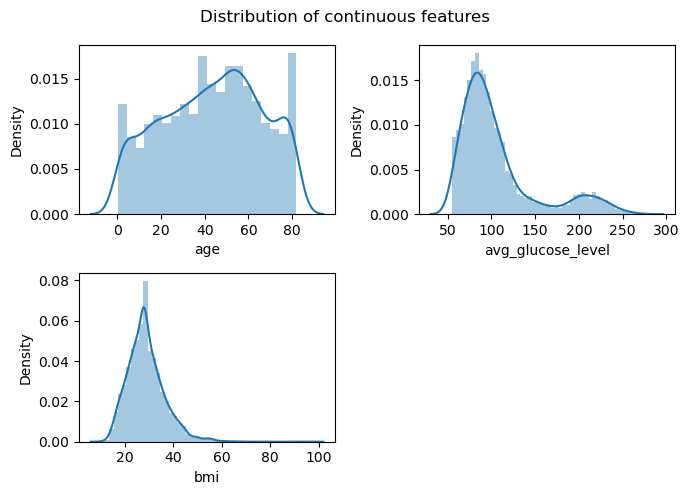

In [24]:
## testing the distribution of continuous data
plt.figure(figsize=(7,5))

for i,j in enumerate(df_num):
    sns.distplot(df[j],ax=plt.subplot(2,2,i+1))
plt.suptitle('Distribution of continuous features')  
plt.tight_layout()
plt.show()

In [25]:
## age has negligible skewness
## avg_glucose_level and bmi are positively skewed 
## applying cbrt & boxcox transformation
df.bmi=np.log(df.bmi)
## boxcox
bc,lamda=boxcox(df.avg_glucose_level)
df.avg_glucose_level=bc
print('Skewness of bmi & avg glucose level is',df.bmi.skew(),'&',df.avg_glucose_level.skew())

Skewness of bmi & avg glucose level is -0.002182016138996291 & 0.08329904162034814


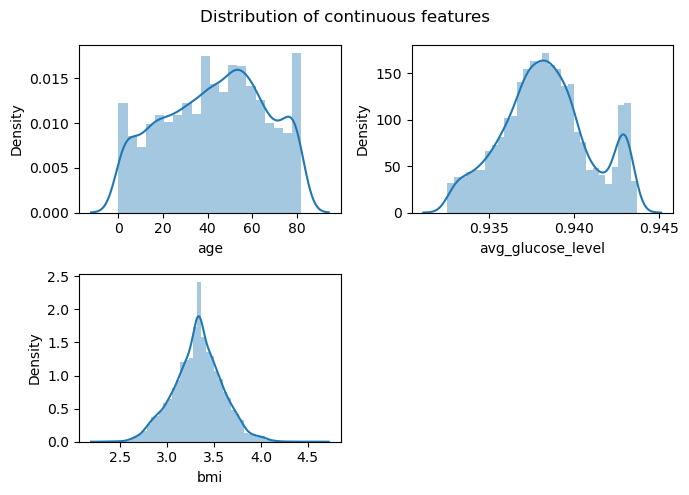

In [26]:
## testing the distribution of continuous data after transformation
plt.figure(figsize=(7,5))

for i,j in enumerate(df_num):
    sns.distplot(df[j],ax=plt.subplot(2,2,i+1))
plt.suptitle('Distribution of continuous features')  
plt.tight_layout()
plt.show()

Bmi seems to follow guassian distribution but it is slightly skewed. Age and avg glucose level doesnt follow guassian distribution. So using f_classif on the continuous features.

In [27]:
## choosing alpha as 0.05
alpha=0.05
## assuming the null and alternate hypothesis
## H0 : The means of the feature values are equal across all classes.. 
## Ha : At least one pair of class means is significantly different.

In [28]:
## X & y variable
X=df[df_num]
y=df.stroke
## f_classif
f_val,p_val=f_classif(X,y)
df_f=pd.DataFrame({'Feature':df_num,'f-value':f_val,'p-value':p_val})

In [29]:
df_f

,Feature,f-value,p-value
0,age,326.916568,7.030778e-71
1,avg_glucose_level,47.631153,5.771133e-12
2,bmi,13.069257,3.030758e-04


In [30]:
selected_features=[feature_id for feature_id,p_val in enumerate(p_val) if p_val<alpha]

for feature_id,p_val in enumerate(p_val):
    if p_val < alpha:
        print('Reject null hypothesis feature is significant')
    else:
        print('Fail to reject null hypothesis feature is not significant')
print('\n')
print('Selected features',selected_features)   

Reject null hypothesis feature is significant
Reject null hypothesis feature is significant
Reject null hypothesis feature is significant


Selected features [0, 1, 2]


As BMI increases, insulin resistance also increases which results in increased blood glucose level in body. Since body weight is associated with BMI, it is expected that BMI will correlate with blood glucose levels. Therefore all 3 features are significant.  

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Dropping the unnecessary columns. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df=df.drop(columns=['id','gender','Residence_type'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Checking the distribution of 'bmi' and 'stroke' columns in the dataset. 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

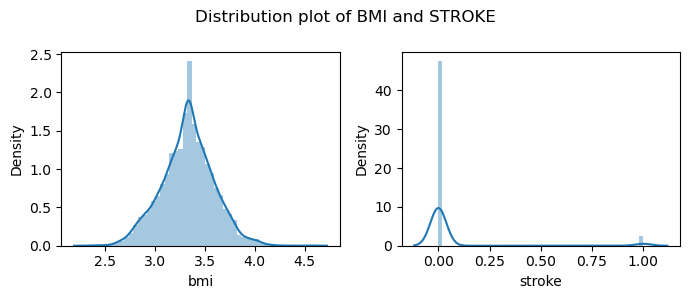

In [32]:
## plotting distribution plot
plt.figure(figsize=(7,3))
for i,j in enumerate(df[['bmi','stroke']].columns):
    plt.subplot(1,2,i+1)
    sns.distplot(df[j])
plt.suptitle('Distribution plot of BMI and STROKE')    
plt.tight_layout()    
plt.show()    

We can see that both the plots are positively skewed. Stroke has a higher skewness compared to bmi.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Columns with high skewness. 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
## first setting the threshold for skewness
## asked to fing higly skewed so setting thresold to 1
threshold=1
## using lambda to filter the skewed columns
skewness=df.apply(lambda x:x.skew())
skewed_col=(skewness[abs(skewness)>threshold].index).to_list()
print('Highly skewed columns are',skewed_col)

Highly skewed columns are ['hypertension', 'heart_disease', 'stroke']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>columns with high kurtosis.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
## first setting the threshold for kurtosis
## asked to fing higly skewed so setting thresold to 3
threshold=3
## using lambda to filter the columns
kurtosis=df.apply(lambda x:x.kurtosis())
kurt_col=(skewness[abs(kurtosis)>threshold].index).to_list()
print('Columns with high kutosis are',kurt_col)

Columns with high kutosis are ['hypertension', 'heart_disease', 'stroke']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Distribution of all variables with respect to the outcome 'stroke' variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
## checking the head
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,0,0.943185,3.600048,2,1
1,61.0,0,0,1,1,0.942763,3.335770,0,1
2,80.0,0,1,1,0,0.939370,3.481240,0,1
3,49.0,0,0,1,0,0.942098,3.538057,-1,1
4,79.0,1,0,1,1,0.942171,3.178054,0,1


In [36]:
## changing dtype of age to int
df['age']=df['age'].astype(int)

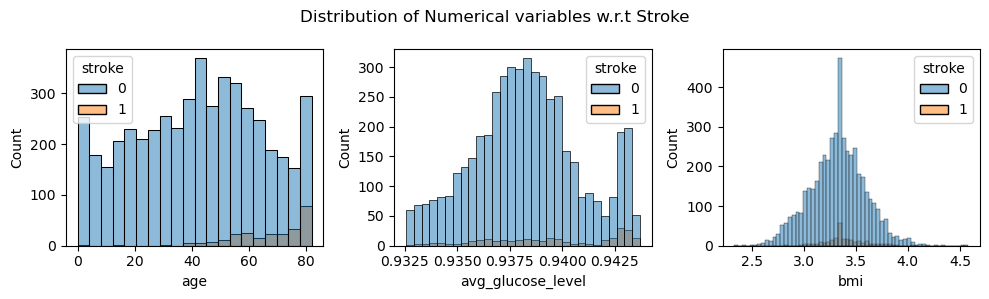

In [37]:
## plotting numerical variable distribution w.r.t stroke
plt.figure(figsize=(10,3))
for i,j in enumerate(df_num):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=df[j],hue=df.stroke)
plt.suptitle('Distribution of Numerical variables w.r.t Stroke')  
plt.tight_layout()
plt.show()

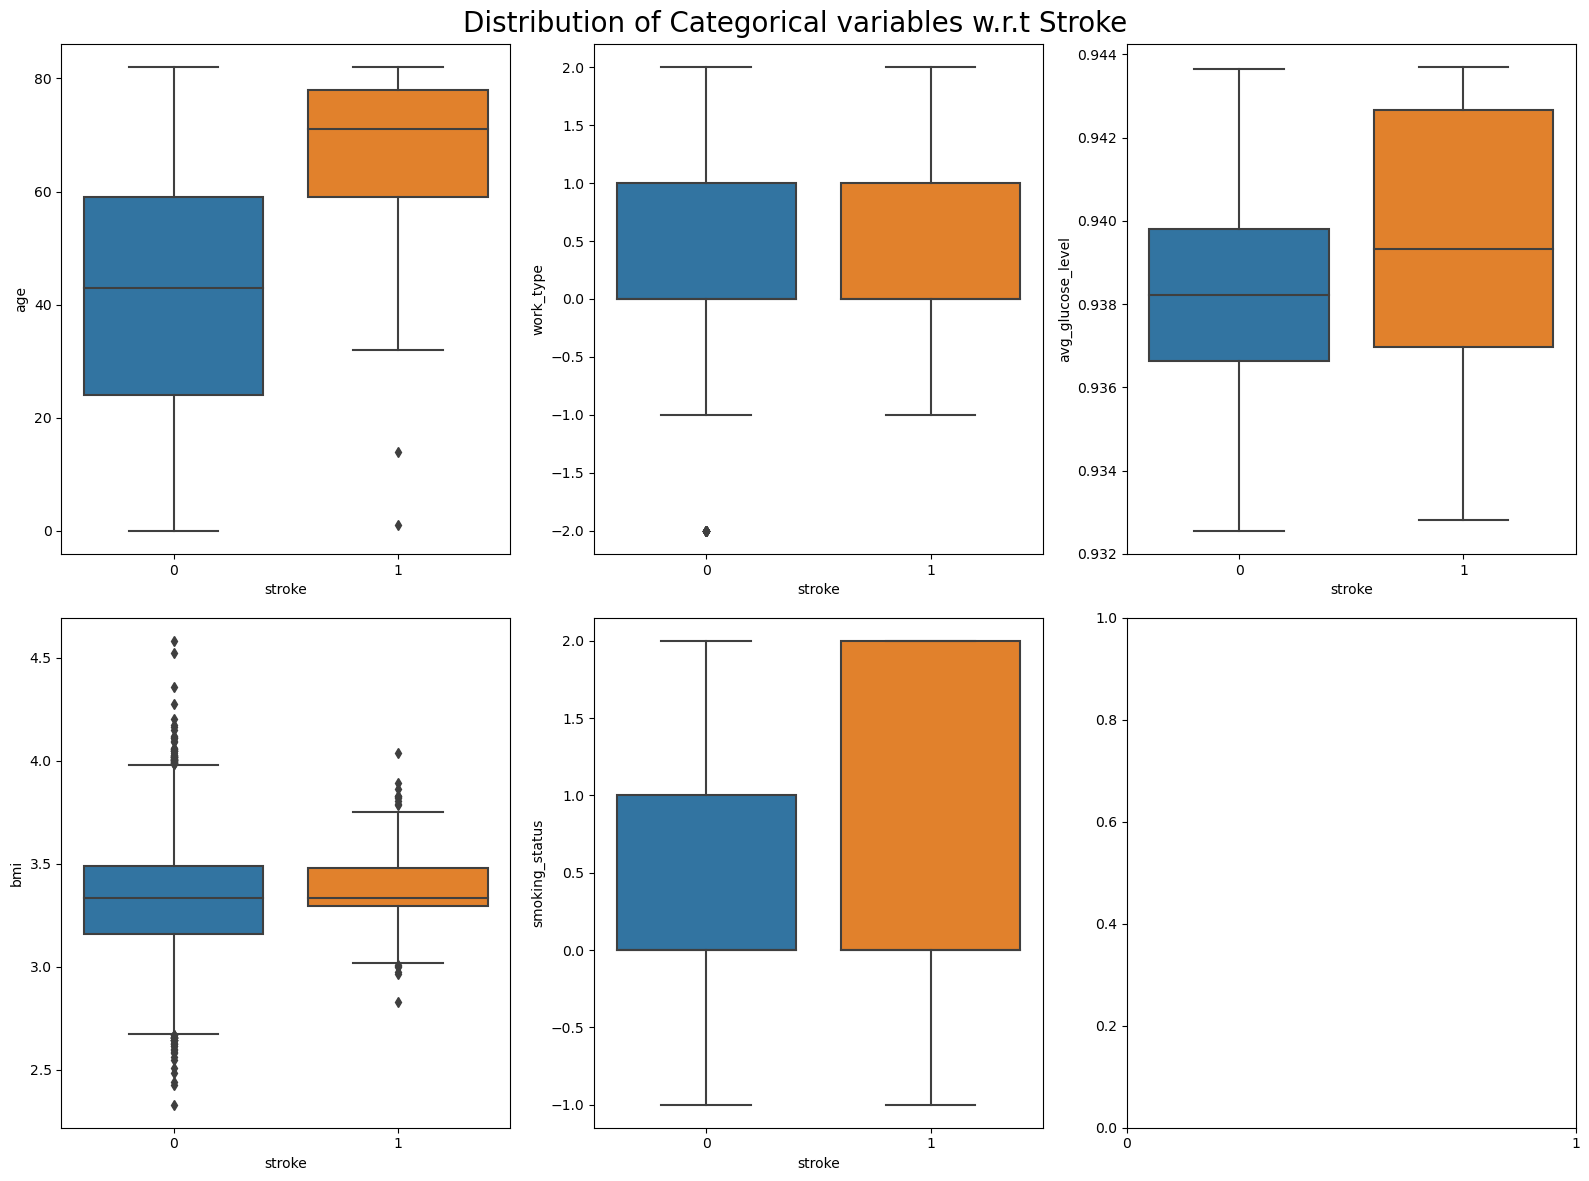

In [38]:
## plotting categorical variable distribution w.r.t stroke

# Create a 2x3 grid of subplots with a specific size
fig, ax = plt.subplots(2, 3, figsize=(16, 12))

# Get the columns from the DataFrame, excluding specific columns
cols = df.drop(columns=['stroke', 'ever_married', 'hypertension', 'heart_disease']).columns

# Loop through pairs of columns and subplots
for i, j in zip(cols, ax.flatten()):
    # Create a box plot with stroke on x-axis and the current column on y-axis
    sns.boxplot(x=df.stroke, y=df[i], ax=j)
    plt.xticks([0, 1])  # Set x-axis ticks to [0, 1] (assuming 'stroke' values are 0 or 1)

# Adjust layout and display the plots
plt.suptitle('Distribution of Categorical variables w.r.t Stroke',fontsize=20)  
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Checking for correlation among variables </b>
                </font>
            </div>
        </td>
    </tr>
</table>

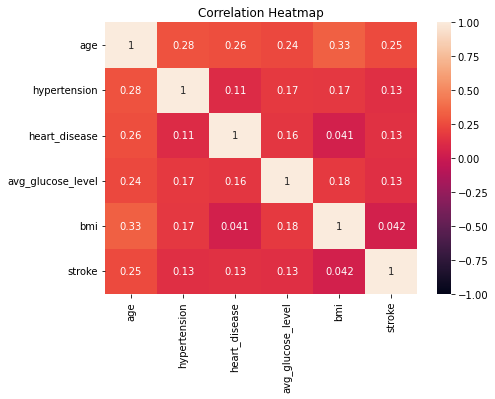

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,vmin=-1.0,vmax=1.0)
plt.title("Correlation Heatmap")
plt.show()

There are no highly correlated features.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Train Test Split 

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
## using train test split
X=df.drop(columns='stroke')
y=df.stroke
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Checking data imbalance</b>
                </font>
            </div>

</td>
    </tr>
</table>

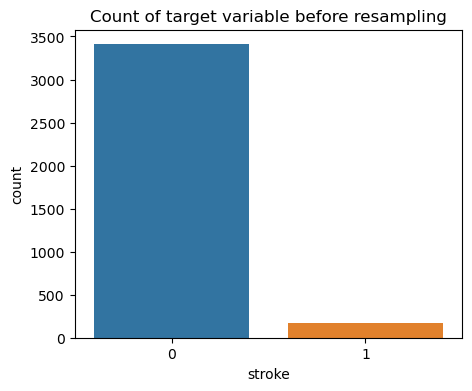

In [41]:
plt.figure(figsize=(5,4))

sns.countplot(x=y_train)

plt.title('Count of target variable before resampling')

plt.show()

- As the data is imbalanced, we perform oversampling.
- We prefer oversampling because the data is not huge.

In [42]:
## Using SMOTETomek
from imblearn.combine import SMOTETomek

print('Shape of X_train before resampling',X_train.shape,
     '\nShape of y_train before resampling',y_train.shape)

sampling=SMOTETomek()

X_train_res,y_train_res = sampling.fit_resample(X_train,y_train)

print('Shape of X_train after resampling',X_train_res.shape,
     '\nShape of y_train after resampling',y_train_res.shape)

Shape of X_train before resampling (3577, 8) 
Shape of y_train before resampling (3577,)
Shape of X_train after resampling (6742, 8) 
Shape of y_train after resampling (6742,)


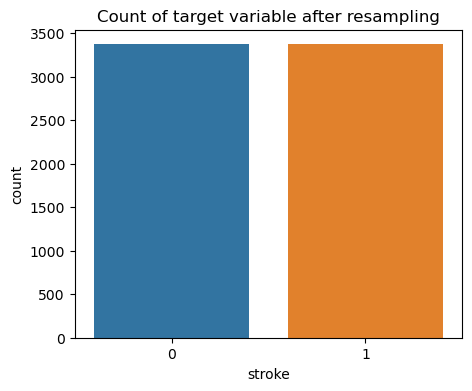

In [43]:
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_res)

plt.title('Count of target variable after resampling')

plt.show()

In [44]:
#Importing required libraries

#Importing library to scale the data
from sklearn.preprocessing import StandardScaler

#Importing libraries to build models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Importing ensemble classifiers
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from xgboost import XGBClassifier

#Importing metrics to evaluate the data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,f1_score,recall_score,precision_score

#To Select the best performing model
from sklearn import model_selection

In [45]:
def metrics(y_test,y_pred):
    print('\nAccuracy score:',accuracy_score(y_test,y_pred),'\n\nConfusion matrix:\n',confusion_matrix(y_test,y_pred),
            '\n\nClassification report:\n',classification_report(y_test,y_pred),
            '\n\nROC-AUC score:',roc_auc_score(y_test,y_pred))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Modelling
  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
## using logistic regression and GNB
models = {
    'Logistic Regression': LogisticRegression(),
    'Gaussian naive bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)

# Make predictions on the test set and evaluate the models
results = {}
for name, model in models.items():
    y_pred=model.predict(X_test)
    print(f"\nClassification Report for {name}:")
    metrics(y_test,y_pred)
    print('\n','--'*50)


Classification Report for Logistic Regression:

Accuracy score: 0.7521200260926288 

Confusion matrix:
 [[1094  359]
 [  21   59]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1453
           1       0.14      0.74      0.24        80

    accuracy                           0.75      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.75      0.82      1533
 

ROC-AUC score: 0.7452124913971094

 ----------------------------------------------------------------------------------------------------

Classification Report for Gaussian naive bayes:

Accuracy score: 0.6986301369863014 

Confusion matrix:
 [[1007  446]
 [  16   64]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      1453
           1       0.13      0.80      0.22        80

    accuracy                           0.70      1533

In [47]:
##  using Decision tree

dt=DecisionTreeClassifier()
dt_model=dt.fit(X_train_res,y_train_res)
y_pred=dt_model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.8493150684931506 

Confusion matrix:
 [[1286  167]
 [  64   16]] 

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1453
           1       0.09      0.20      0.12        80

    accuracy                           0.85      1533
   macro avg       0.52      0.54      0.52      1533
weighted avg       0.91      0.85      0.88      1533
 

ROC-AUC score: 0.5425326909841707


In [48]:
## Hyperparameter tuning for Decision tree

param_grid={'max_depth':[10,15,20,25,30],
           'min_samples_leaf':[3,15,30],
           'min_samples_split':[15,30,35,40,50]}

dt=DecisionTreeClassifier()

grid_sarch=GridSearchCV(estimator=dt,param_grid=param_grid,cv=3)
grid_sarch.fit(X_train_res,y_train_res)

print(grid_sarch.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}


In [49]:
#Decision tree with best parameters

dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=3,min_samples_split=15)
dt_model=dt.fit(X_train_res,y_train_res)
y_pred=dt_model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.8493150684931506 

Confusion matrix:
 [[1282  171]
 [  60   20]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1453
           1       0.10      0.25      0.15        80

    accuracy                           0.85      1533
   macro avg       0.53      0.57      0.53      1533
weighted avg       0.91      0.85      0.88      1533
 

ROC-AUC score: 0.5661562284927736


In [50]:
## To use KNN algorithm, the independant variables need to be scaled. 
## We use standard scalar in order to scale the variables.

X_train_scaled=StandardScaler().fit_transform(X_train_res)
X_test_scaled=StandardScaler().fit_transform(X_test)

## Hyperparameter tuning is used to obtain the best parameters to perform KNN
knn=KNeighborsClassifier()

params = {'n_neighbors':[i for i in range(3,16,2)],'metric':['manhattan','minkowski','euclidean']}
knn_best_estimator = GridSearchCV(estimator=knn,param_grid=params,cv=10).fit(X_train_scaled,y_train_res)

print('Best parameters for knn:',knn_best_estimator.best_params_)

Best parameters for knn: {'metric': 'manhattan', 'n_neighbors': 3}


In [51]:
## building a KNN model and printing metrics

knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors=3)
knn_model=knn.fit(X_train_scaled,y_train_res)
y_pred=knn_model.predict(X_test_scaled)
metrics(y_test,y_pred)


Accuracy score: 0.6744944553163731 

Confusion matrix:
 [[991 462]
 [ 37  43]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80      1453
           1       0.09      0.54      0.15        80

    accuracy                           0.67      1533
   macro avg       0.52      0.61      0.47      1533
weighted avg       0.92      0.67      0.76      1533
 

ROC-AUC score: 0.6097685822436338


## Ensemble methods

In [52]:
## building a Random forest model and printing metrics

rf=RandomForestClassifier()
model=rf.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.8806262230919765 

Confusion matrix:
 [[1324  129]
 [  54   26]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      1453
           1       0.17      0.33      0.22        80

    accuracy                           0.88      1533
   macro avg       0.56      0.62      0.58      1533
weighted avg       0.92      0.88      0.90      1533
 

ROC-AUC score: 0.6181090846524432


In [ ]:
## Hyperparameter tuning for random forest

param_grid={'max_depth':[7,10],
           'min_samples_leaf':[3,15,30],
           'min_samples_split':[30,50,100],
           'max_features':[4,6]}


grid_sarch=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10)
grid_sarch.fit(X_train_res,y_train_res)

print(grid_sarch.best_params_)

In [53]:
## Random forest with best parameters

rf=RandomForestClassifier(max_depth=10,max_features=6,min_samples_leaf=3,min_samples_split=30,random_state=1)
model=rf.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.8023483365949119 

Confusion matrix:
 [[1188  265]
 [  38   42]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      1453
           1       0.14      0.53      0.22        80

    accuracy                           0.80      1533
   macro avg       0.55      0.67      0.55      1533
weighted avg       0.93      0.80      0.85      1533
 

ROC-AUC score: 0.6713093599449415


In [54]:
## Bagging classifier and printing metrics

bagging=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=100)
bagging_model=bagging.fit(X_train_res,y_train_res)
y_pred=bagging_model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.8891063274624919 

Confusion matrix:
 [[1336  117]
 [  53   27]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1453
           1       0.19      0.34      0.24        80

    accuracy                           0.89      1533
   macro avg       0.57      0.63      0.59      1533
weighted avg       0.92      0.89      0.90      1533
 

ROC-AUC score: 0.6284884721266345


In [55]:
## Gradient Boosting model and its metrics

gb=GradientBoostingClassifier()
gb_model=gb.fit(X_train_res,y_train_res)
y_pred=gb_model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.7899543378995434 

Confusion matrix:
 [[1164  289]
 [  33   47]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      1453
           1       0.14      0.59      0.23        80

    accuracy                           0.79      1533
   macro avg       0.56      0.69      0.55      1533
weighted avg       0.93      0.79      0.84      1533
 

ROC-AUC score: 0.6943005849965588


In [ ]:
## Parameter tuning for Gradient boosting

param_grid = {'n_estimators':[100,200,300],
             'learning_rate':[0.1,0.01],
             'criterion':['friedman_mse','squared_error'],
             'min_samples_split':[30,50,100]}


grid_sarch=GridSearchCV(estimator=gb,param_grid=param_grid,cv=10)
grid_sarch.fit(X_train_res,y_train_res)

print(grid_sarch.best_params_)

In [56]:
## Gradient boosting for best parameters

gb=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,min_samples_split=100,n_estimators=300)
gb_model=gb.fit(X_train_res,y_train_res)
y_pred=gb_model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.8134377038486628 

Confusion matrix:
 [[1208  245]
 [  41   39]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      1453
           1       0.14      0.49      0.21        80

    accuracy                           0.81      1533
   macro avg       0.55      0.66      0.55      1533
weighted avg       0.92      0.81      0.86      1533
 

ROC-AUC score: 0.6594416724019271


In [57]:
## AdaBoost Classifier

ada=AdaBoostClassifier(random_state=100)
model=ada.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.7534246575342466 

Confusion matrix:
 [[1100  353]
 [  25   55]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85      1453
           1       0.13      0.69      0.23        80

    accuracy                           0.75      1533
   macro avg       0.56      0.72      0.54      1533
weighted avg       0.93      0.75      0.82      1533
 

ROC-AUC score: 0.7222771851342051


In [ ]:
## Hyperparameter tuning for AdaBoostClassifier

param_grid = {'n_estimators':[100,200,300],
              'learning_rate':[0.1,0.01,0.02,0.2]}


grid_sarch=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_grid,cv=10)
grid_sarch.fit(X_train,y_train)

print(grid_sarch.best_params_)

In [58]:
## AdaBoost Classifier with best parameters

ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.2,random_state=100)
model=ada.fit(X_train_res,y_train_res)
y_pred=model.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.7384213959556425 

Confusion matrix:
 [[1070  383]
 [  18   62]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1453
           1       0.14      0.78      0.24        80

    accuracy                           0.74      1533
   macro avg       0.56      0.76      0.54      1533
weighted avg       0.94      0.74      0.81      1533
 

ROC-AUC score: 0.7557037164487267


In [59]:
## XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train_res,y_train_res)
y_pred=xgb.predict(X_test)
metrics(y_test,y_pred)


Accuracy score: 0.8643183300717547 

Confusion matrix:
 [[1300  153]
 [  55   25]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93      1453
           1       0.14      0.31      0.19        80

    accuracy                           0.86      1533
   macro avg       0.55      0.60      0.56      1533
weighted avg       0.92      0.86      0.89      1533
 

ROC-AUC score: 0.6036003097040605


In [ ]:
## Hyperparameter tuning for XGBClassifier

param_grid = {'n_estimators':[100,200,300],
              'learning_rate':[0.1],
              'colssample_bytree':[0.5,0.8],
             'max_depth':[2,4,6]}


grid_sarch=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=3)
grid_sarch.fit(X_train,y_train)

print(grid_sarch.best_params_)

In [60]:
## XGBClassifier with best parameters

xgb=XGBClassifier(colssample_bytree= 0.5, learning_rate= 0.1, max_depth=2, n_estimators= 300)
xgb.fit(X_train_res,y_train_res)
y_pred=xgb.predict(X_test)
metrics(y_test,y_pred)

[23:43:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colssample_bytree" } are not used.


Accuracy score: 0.7729941291585127 

Confusion matrix:
 [[1137  316]
 [  32   48]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      1453
           1       0.13      0.60      0.22        80

    accuracy                           0.77      1533
   macro avg       0.55      0.69      0.54      1533
weighted avg       0.93      0.77      0.83      1533
 

ROC-AUC score: 0.6912594631796284


### Model Selection

In [61]:
#Performed models

lr=LogisticRegression()
gnb=GaussianNB()
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=3,min_samples_split=15)
knn=knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors=3)
bagging=bagging=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=100)
rf=RandomForestClassifier(max_depth=10,max_features=6,min_samples_leaf=3,min_samples_split=30,random_state=1)
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.2,random_state=100)
xg=XGBClassifier(learning_rate= 0.1, max_depth=2, n_estimators= 300)
gb=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,min_samples_split=100,n_estimators=300)

models = []

models.append(('Logistic Regression', lr))
models.append(('Decsion Tree Classifier', dt))
models.append(('Gaussian Naive Bayes', gnb))
models.append(('KNN', knn))
models.append(('Bagging Classifier', bagging))
models.append(('Random forest Classifier', rf))
models.append(('AdaBoost Classifier', ada))
models.append(('XGBoost Classifier', xg))
models.append(('Gradient Boosting Classifier', gb))

Logistic Regression: 0.675315 (0.038902)
Decsion Tree Classifier: 0.833210 (0.015717)
Gaussian Naive Bayes: 0.735905 (0.038403)
KNN: 0.828635 (0.076739)
Bagging Classifier: 0.880652 (0.020572)
Random forest Classifier: 0.857567 (0.050571)
AdaBoost Classifier: 0.731454 (0.049020)
XGBoost Classifier: 0.795252 (0.041172)
Gradient Boosting Classifier: 0.859792 (0.037032)


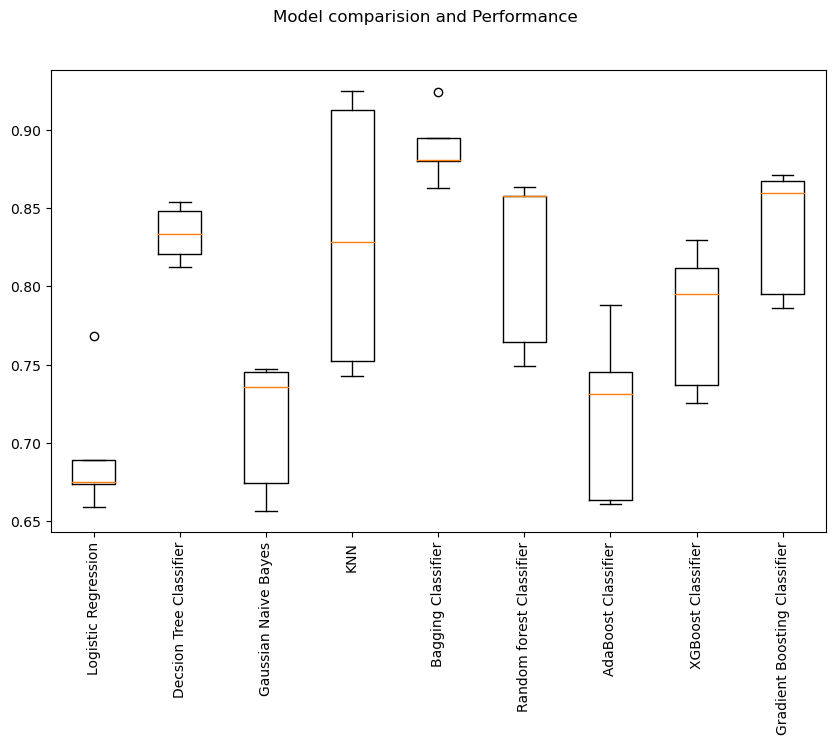

In [62]:
#Let's plot the accuracy scores of the models to compare them

results = []
names = []


for name, model in models:
    if name!='KNN':
        kfold = model_selection.KFold(n_splits=5)
        cv_results = model_selection.cross_val_score(model, X_train_res, y_train_res, cv=kfold)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
        print(msg)
    else:
        kfold = model_selection.KFold(n_splits=5)
        cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train_res, cv=kfold)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
        print(msg)
        
# comparision of Algorithms using Boxplots
fig = plt.figure(figsize=(10,6))
fig.suptitle('Model comparision and Performance')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()

### Conclusion

The data was highly imbalanced. This imbalance resulted in affecting the precision and recall values. This required us to perfrom suitable balancing techniques.

Our analysis showcases a spectrum of outcomes across the models and ensemble techniques employed. The results reflect the intrinsic complexities of our data and the varying capabilities of each algorithm to capture its nuances.

Starting with Logistic Regression, we established a foundational benchmark for our predictive task. Subsequently, the Decision Tree Classifier exhibited promising accuracy at 0.833, suggesting its aptitude in capturing intricate patterns in the data.

The Gaussian Naive Bayes model achieved a respectable accuracy of 0.736, demonstrating its surprising effectiveness given its simplistic assumptions. Similarly, the K-Nearest Neighbors method achieved an accuracy of 0.829 by exploiting local relationships among data points.

Transitioning to ensemble techniques, the Bagging Classifier excelled with an accuracy of 0.881, showcasing the power of aggregating multiple models. The Random Forest Classifier closely followed with an accuracy of 0.858, validating its ability to mitigate overfitting while retaining predictive prowess.

The AdaBoost Classifier's accuracy of 0.731 might indicate challenges in forming a robust ensemble, possibly due to the inherent complexity of the problem. Meanwhile, the XGBoost Classifier achieved an accuracy of 0.795, highlighting its potential as a strong performer.

Lastly, the Gradient Boosting Classifier scored an accuracy of 0.860, representing an optimal balance between model complexity and predictive power.

In essence, our comprehensive analysis reaffirms the significance of model selection, hyperparameter tuning, and ensemble methods. It underscores the need for a meticulous approach tailored to the unique attributes of our data. 

Based on the boxplot we choose XGboost as the best model because it has the least variation, which means a better model.